# Guidelines
In this activity, you are given a canonical ensemble of the Ising model (a list of the microstates where each microstate contains the spins of each cell in the 2d grid model at different time steps). The states were generated by starting the Ising model with a state that is very unlikely according to the Boltzmann distribution and then the model was allowed to evolve overtime under 3000K to reach equilibirum (reach a more likely state according to the Boltzmann distribution). The ensemble is a list of these states of the model as it evolved overtime but they have been shuffled. Your goal is to find the most likely state and least likely state.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import random
import pandas as pd

## Run the following cell to load the ensemble (list of states)

In [2]:
states= np.loadtxt("https://raw.githubusercontent.com/MoGaber/Statistical-Mechanics-Data/main/Ising_states.csv",  delimiter=",").reshape(701, 60, 60)

## Run the following cells to visualize how one of these microstates look like

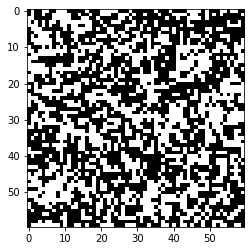

In [3]:
pylab.imshow(states[0], vmin = 0, vmax = 1, cmap = pylab.cm.binary)
plt.show()

## How can you find the most likely and least likely states? what characterizes these states?

In [4]:
# Write your answer in markdown here:


## Use th following cells to find the most likely and least likely states. How do you think these states will look like? write your answer first and then visualize them to see if they match what you expect. Get the probabilities of each of these two states (use the partition function to normalize them). 

### Hint: You will need the following to find the states:

the Hamiltonain for each cell in the ising model is given by $-J \sum_{ij} s_{i}s_{j} \$ where i and j represents all the four neighbors surronding one cell.

The total energy of the state is the sum over each Hamiltonain of each cell in that state.

J = 6.34369e-21  -> Interaction constant 

kB = 1.38065e-23 -> Boltzman Constant

T = 3000 -> temperature in Kelvin

Boltzmann = e^-E/T*KB

# Answer

In [5]:
# getting the energy of each state
J = 6.34369e-21
kB = 1.38065e-23

T = 3000
size = len(states[0])
energies = []
for config in states:
    energy = 0
    for x in range(size):
        for y in range(size):
            energy+= (J * config[x, y]   *(
                            config[(x + 1) % size, y] +
                            config[(x - 1) % size, y] +
                            config[x, (y + 1) % size] +
                            config[x, (y - 1) % size]))
    energies.append(energy)

In [6]:
#the canonical partition function
partition_normalization = sum([np.exp(-i/ (T*kB) ) for i in energies])

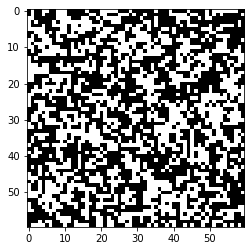

In [7]:
# the most likely state is the one with the minimum energy:

most_likely = states[np.argmin(energies)]
pylab.imshow(most_likely, vmin = 0, vmax = 1, cmap = pylab.cm.binary)
plt.show()

In [8]:
# the probability of the most likely state
(np.exp(-min(energies)/ (T*kB))) / partition_normalization

0.9939984035963068

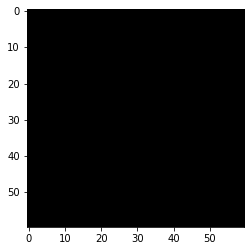

In [9]:
# the least likely state is the one with the least energy:
most_unlikely = states[np.argmax(energies)]
pylab.imshow(most_unlikely, vmin = 0, vmax = 1, cmap = pylab.cm.binary)

In [10]:
# the probability of the least likley state:
(np.exp(-max(energies)/ (T*kB))) / partition_normalization

0.0

## Now, let's take a look at the macroscopic behavior of the system. Make a plot of the energies overtime assuming that the system started with the highest energy and ended with the minimum energy.

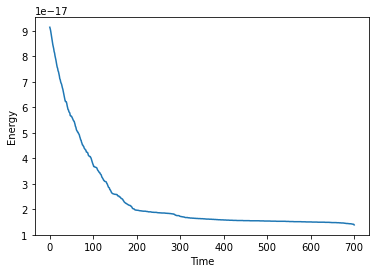

In [11]:
plt.plot(sorted(energies, reverse=True))
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

## Make a histogram of the energies. Which distribution does it correspond to? 
Increase the number of bins to see the distribution.

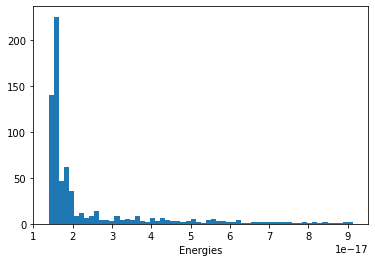

In [12]:
plt.hist(sorted(energies, reverse=True), bins=60)
plt.xlabel("Energies")
plt.show()
# that's the Boltzmann distribution

# Extra task only if you have time
Order the states according to their energies (the states with the highest energy comes first) then use the function below to plot the time-lapse of the model.

In [13]:
import matplotlib
import matplotlib.animation as animation
from IPython.display import Video
import matplotlib as mpl

def build_animation(states, save_name):
    """
    A function that makes a very nice animation 
    
    Source: https://stackoverflow.com/questions/17212722/matplotlib-imshow-how-to-animate
    """
    
    fps = 20
    nSeconds = len(states)// fps

    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    a = states[0]



    pylab.cla()
    im = pylab.imshow(a, vmin = 0, vmax = 1, cmap = pylab.cm.binary)


    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(states[i])
        return [im]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = nSeconds * fps,
                                   interval = 1000 / fps, # in ms
                                   )

    anim.save(save_name, fps=fps, extra_args=['-vcodec', 'libx264'])

    print('Done!')


In [14]:
# find the "ordered_states" first and then rund the following three lines:
#from IPython.display import Video
#build_animation(ordered_states, "video.mp4")
#Video("video.mp4")

## Solution

....................................Done!


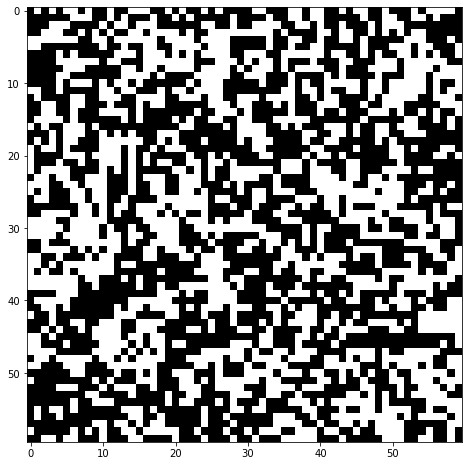

In [15]:
ordered_states = np.flip(states[np.argsort(energies)])
from IPython.display import Video
build_animation(ordered_states, "video.mp4")
Video("video.mp4")